In [1]:
import pandas as pd
import zipfile
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy.interpolate import griddata
from astroML.stats import binned_statistic_2d
import numpy as np
from astroML.plotting import hist
%matplotlib inline

In [2]:
dats=pd.read_csv('ALL-2MASS-matched.csv')

dats['Bmag']=dats['BmV']+dats['Vmag']
dats['Umag']=dats['UmB']+dats['Bmag']
dats['Rmag']=dats['Vmag']-dats['VmR']
dats['Imag']=dats['Vmag']-dats['VmI']

In [4]:
dats.head(2)

,ID,Vmag,Vmag_ERR,UmB,UmB_ERR,BmV,BmV_ERR,VmR,VmR_ERR,VmI,...,j_m_stdap,j_msig_stdap,h_m_stdap,h_msig_stdap,k_m_stdap,k_msig_stdap,Bmag,Umag,Rmag,Imag
0,1467,16.2973,0.0241,0.7610,0.0439,1.1621,0.0289,0.7236,0.0289,1.3530,...,14.068,0.038,13.613,0.036,13.339,0.083,17.4594,18.2204,15.5737,14.9443
1,1018,15.8624,0.0253,99.9999,99.9999,1.2095,0.0291,0.7678,0.0292,1.4067,...,13.464,0.037,12.844,0.039,12.824,0.033,17.0719,117.0718,15.0946,14.4557


In [5]:
ebv_m3 = pd.read_csv('ebvs_m3_35l_stats.dat',header=None)

In [6]:
ebv_p1 = pd.read_csv('ebvs_p1_35l_stats.dat',header=None)

In [7]:
absv_m3 = pd.read_csv('canis_absVs.dat',sep='\t',header=None)
absv_p1 = pd.read_csv('canis_absVs_p1.dat',sep='\t',header=None)


In [8]:
ebv_p1.head()

,0,1,2
0,0.294290,0.050473,1928
1,0.284259,0.016337,1889
2,0.382576,0.067329,2219
3,0.257450,0.095184,3096
4,0.082414,0.037743,3156


In [9]:
absv_m3[0] = absv_m3[0].map(lambda x: x.lstrip('vnSt').rstrip('.dft')).astype(int)

In [10]:
absv_p1[0] = absv_p1[0].map(lambda x: x.lstrip('vnSt').rstrip('.dft')).astype(int)

In [11]:
fullm3 = pd.merge(absv_m3,pd.merge(ebv_m3,dats,left_on=[2],right_on='ID'),left_on=[0],right_on='ID')
fullp1 = pd.merge(absv_p1,pd.merge(ebv_p1,dats,left_on=[2],right_on='ID'),left_on=[0],right_on='ID')

In [12]:
fullp1.head()

,0,0_x,1_x,0_y,1_y,2,ID,Vmag,Vmag_ERR,UmB,...,j_m_stdap,j_msig_stdap,h_m_stdap,h_msig_stdap,k_m_stdap,k_msig_stdap,Bmag,Umag,Rmag,Imag
0,1928,1928,1.721809,0.294290,0.050473,1928,1928,17.0384,0.0246,99.9999,...,14.057,0.034,13.525,0.047,13.419,0.052,18.0719,118.0718,15.8138,15.1439
1,1889,1889,0.439837,0.284259,0.016337,1889,1889,16.8150,0.0241,0.4688,...,14.458,0.060,13.858,0.016,13.766,0.133,18.0507,18.5195,16.0482,15.3769
2,2219,2219,1.927575,0.382576,0.067329,2219,2219,16.7786,0.0252,0.8611,...,14.496,0.027,13.988,0.043,13.835,0.180,17.9957,18.8568,16.0736,15.4306
3,3096,3096,1.356422,0.257450,0.095184,3096,3096,17.5759,0.0245,0.6155,...,15.363,0.087,14.706,0.056,14.403,0.062,18.8074,19.4229,16.8400,16.1925
4,3156,3156,-0.130629,0.082414,0.037743,3156,3156,17.5775,0.0246,99.9999,...,15.191,0.104,14.718,0.073,14.731,0.301,18.7464,118.7463,16.8488,16.1992


In [13]:
dis_m3 = 10 **(((fullm3['Vmag']-fullm3['0_y']-fullm3['1_x'])+5)/5) /1000

In [14]:
dis_p1 = 10 **(((fullp1['Vmag']-fullp1['0_y']-fullp1['1_x'])+5)/5) /1000

In [15]:
fullp1['diserr'] = (10 **(((fullp1['Vmag']-fullp1['0_y']+0.7-fullp1['1_x'])+5)/5) /1000 -10 **(((fullp1['Vmag']-fullp1['0_y']-0.7-fullp1['1_x'])+5)/5) /1000)/2

In [16]:
fullm3['diserr'] = (10 **(((fullm3['Vmag']-fullm3['0_y']+0.7-fullm3['1_x'])+5)/5) /1000 -10 **(((fullm3['Vmag']-fullm3['0_y']-0.7-fullm3['1_x'])+5)/5) /1000)/2

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<Container object of 3 artists>

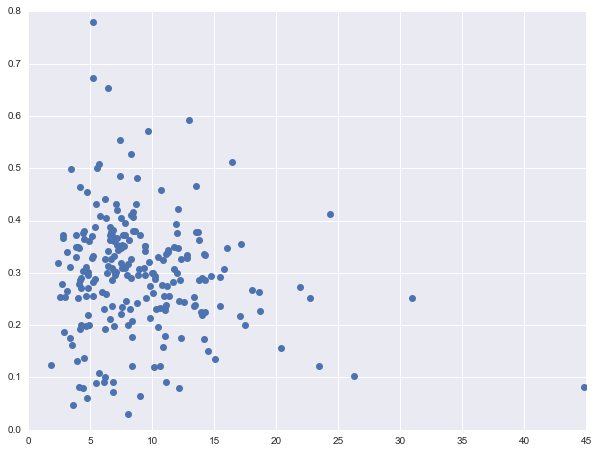

In [17]:
%pylab inline
pylab.rcParams['figure.figsize']=(10.,7.5)
axes=plt.gca()
#axes.set_xlim([0,60])
#sns.plt.errorbar(dis_m3,fullm3['0_y'],yerr=fullm3['1_y'],xerr=fullm3['diserr'],fmt='o')
sns.plt.errorbar(dis_m3,fullm3['0_y'],fmt='o')

In [18]:
len(dis_m3)

237

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<Container object of 3 artists>

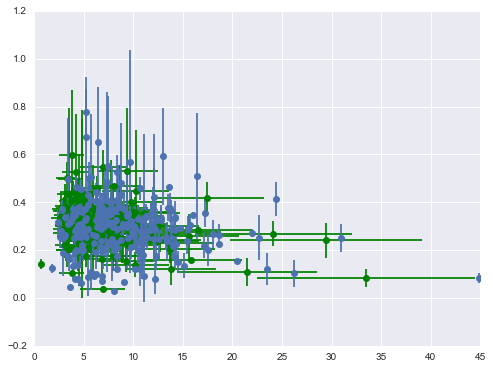

In [19]:
%pylab inline
pylab.rcParams['figure.figsize']=(8.,6.)
sns.plt.errorbar(dis_p1,fullp1['0_y'],yerr=fullp1['1_y'],xerr=fullp1['diserr'],fmt='o',c='g')
sns.plt.errorbar(dis_m3,fullm3['0_y'],yerr=fullm3['1_y'],fmt='o')

In [20]:
dis_p1.describe()

count    176.000000
mean       6.948704
std        4.352630
min        0.705310
25%        4.239908
50%        5.826749
75%        8.274661
max       33.507567
dtype: float64

In [21]:
dis_m3.describe()

count    233.000000
mean       9.034890
std        5.144381
min        1.799529
25%        5.470337
50%        7.837892
75%       11.186194
max       44.813910
dtype: float64

In [22]:
fullp1['0_y'].describe()

count    178.000000
mean       0.311560
std        0.089483
min        0.039066
25%        0.255161
50%        0.309103
75%        0.367407
max        0.599025
Name: 0_y, dtype: float64

In [23]:
fullm3['0_y'].describe()

count    237.000000
mean       0.299691
std        0.115228
min        0.030407
25%        0.235013
50%        0.299973
75%        0.362708
max        0.779334
Name: 0_y, dtype: float64

In [24]:
ll = (dis_m3.dropna(axis=0)-dis_p1.dropna(axis=0)).astype(float)

In [25]:
ll.describe()

count    173.000000
mean       2.701698
std        6.212591
min      -21.985302
25%       -0.233968
50%        2.205752
75%        5.873269
max       35.991705
dtype: float64

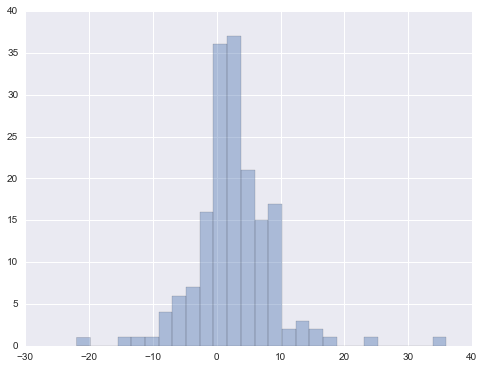

In [26]:
sns.distplot(ll.dropna(),kde=False)

In [27]:
l2 = (dis_m3.dropna(axis=0)-dis_p1.dropna(axis=0))/dis_m3.dropna(axis=0).astype(float).dropna(axis=0)

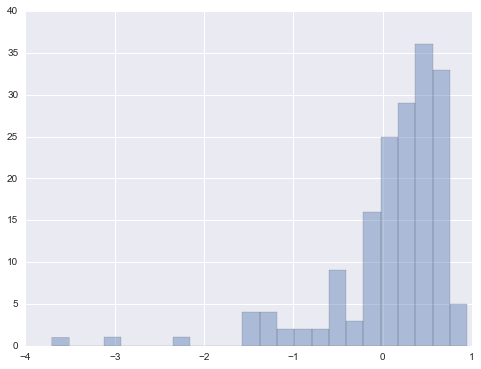

In [28]:
sns.distplot(l2.dropna(),kde=False)

In [29]:
l2.mean()

0.11357069887625947

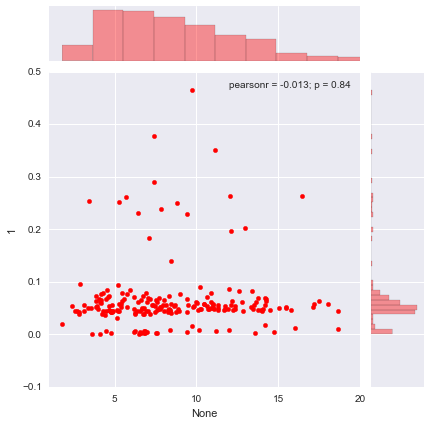

In [30]:
nn=sns.jointplot(dis_m3,ebv_m3[1],color='r',xlim=(1,20))
# nn.x=dis_p1
# nn.y=ebv_p1[1]
# nn.plot_joint(plt.scatter,color='g')

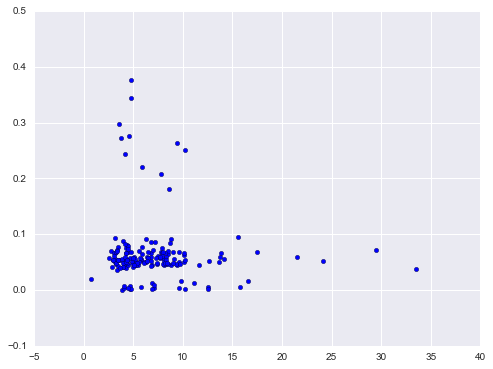

In [31]:
sns.plt.scatter(dis_p1,ebv_p1[1])

In [32]:
paras = pd.read_csv('Sp_ace/paras_full_v2.dat',header=None,sep=' ')

In [33]:
paras.head(2)

,0,1,2,3,4,5,6
0,vnSt02801.dft,4916,110.5,3.37,0.19,-0.62,0.08
1,vnSt01928.dft,4661,111.0,2.82,0.35,-0.38,0.12


In [34]:
paras[0] = paras[0].map(lambda x: x.lstrip('vnSt').rstrip('.dft')).astype(int)

In [35]:
fullm3 = pd.merge(fullm3,paras,left_on=[0],right_on=[0])

In [36]:
fullm3l = fullm3.loc[fullm3[3] <= 3.5]

In [37]:
dis_m3l = 10 **(((fullm3l['Vmag']-fullm3l['1_y']-fullm3l['1_x'])+5)/5) /1000

In [38]:
fullp1 = pd.merge(fullp1,paras,left_on=[0],right_on=[0])

In [39]:
fullp1l = fullp1.loc[fullp1[3] <= 3.5]

In [40]:
dis_p1l = 10 **(((fullp1l['Vmag']-fullp1l['1_y']-fullp1l['1_x'])+5)/5) /1000

In [41]:
ll2 = (dis_m3l.dropna(axis=0)-dis_p1l.dropna(axis=0)).astype(float)

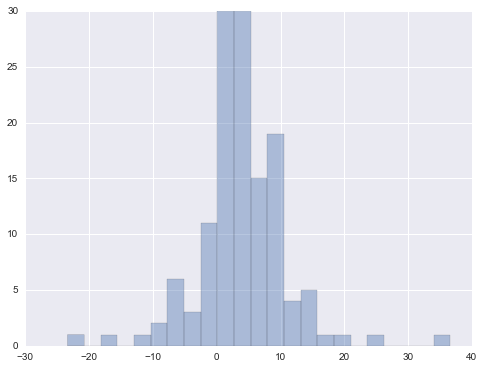

In [42]:
sns.distplot(ll2.dropna(),kde=False)

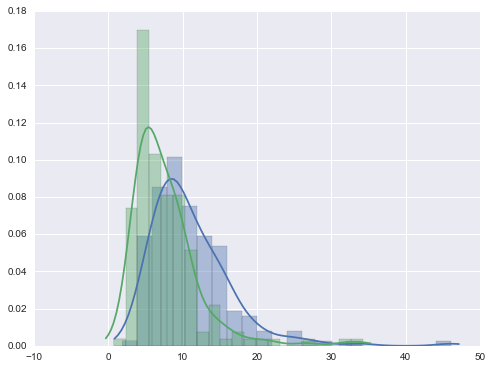

In [43]:
sns.distplot(dis_m3l.dropna())
sns.distplot(dis_p1l.dropna())

In [44]:
(ebv_m3[1]-ebv_p1[1]).describe()

count    161.000000
mean       0.003118
std        0.094445
min       -0.317803
25%       -0.027378
50%       -0.001096
75%        0.022684
max        0.412440
Name: 1, dtype: float64

In [45]:
len(fullm3l),len(dis_m3l)

(191, 191)

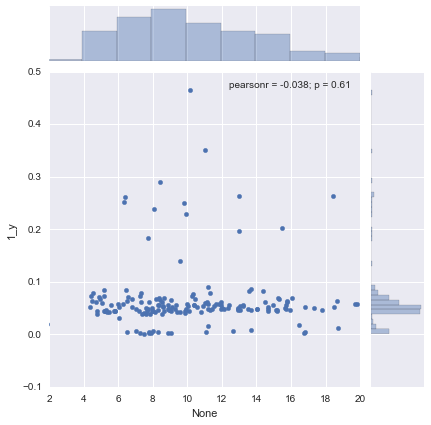

In [46]:
sns.jointplot(dis_m3l,fullm3l['1_y'],xlim=(2,20))

In [47]:
bright = pd.read_csv('Sp_ace/paras_bright_abdon.dat',sep=' ',header=None)

In [48]:
bright[0] = bright[0].map(lambda x: x.lstrip('vnSt').rstrip('.dft')).astype(int)

In [49]:
bright.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,755,5397,5315,5473,3.22,3.05,3.48,-0.44,-0.48,-0.34,-29.4,4.91,101.0,1.27
1,1301,5042,4860,5232,3.23,2.88,3.59,-0.57,-0.72,-0.41,-22.3,5.50,63.1,0.88


In [50]:
fullm3.head(2)

,0,0_x,1_x,0_y,1_y,2_x,ID,Vmag,Vmag_ERR,UmB,...,Umag,Rmag,Imag,diserr,1,2_y,3,4,5,6
0,2801,2801,1.981351,0.179640,0.057002,2801,2801,17.3668,0.0252,99.9999,...,118.4628,16.6741,16.0320,3.605799,4916,110.5,3.37,0.19,-0.62,0.08
1,1928,1928,0.796001,0.291773,0.050013,1928,1928,17.0384,0.0246,99.9999,...,118.0718,15.8138,15.1439,5.081183,4661,111.0,2.82,0.35,-0.38,0.12


In [51]:
fullm3['dis'] = dis_m3

In [52]:
bright = pd.merge(bright,fullm3,left_on=[0],right_on=[0],suffixes=('y','z'))

<Container object of 3 artists>

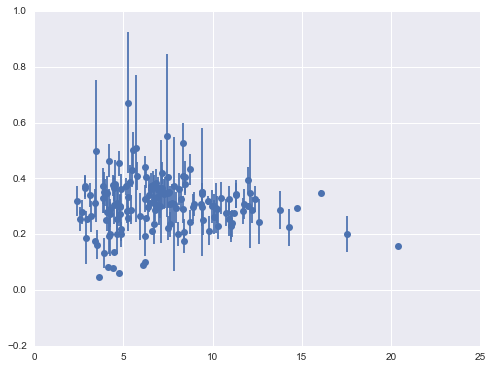

In [53]:
plt.errorbar(bright['dis'],bright['0_y'],yerr=bright['1_y'],fmt='o')

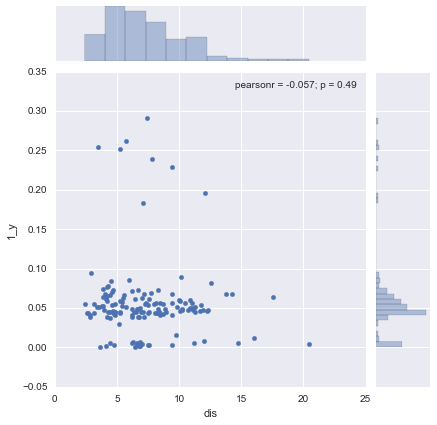

In [54]:
sns.jointplot(bright['dis'],bright['1_y'])

In [55]:
datas = pd.DataFrame([bright['GLAT'],bright['GLON'],bright['1_y']]).T

In [56]:
np.array(bright['1_y'])

array([ 0.04155259,  0.07275238,  0.04496189,  0.00505871,  0.04530458,
        0.07369191,  0.03814038,  0.09477892,  0.04669327,  0.19566464,
        0.05789374,  0.07323638,  0.0432759 ,  0.04286726,  0.03796842,
        0.05297302,  0.05266048,  0.0607378 ,         nan,  0.05853684,
        0.04507566,  0.05654342,  0.23914767,  0.04440378,  0.06758987,
        0.22939969,  0.05490325,  0.03024535,  0.00259061,  0.04802452,
        0.04721706,  0.0816944 ,  0.06663883,  0.04467916,  0.29068988,
        0.05685933,         nan,  0.06295307,  0.04328676,  0.06366077,
        0.048711  ,  0.06884502,  0.08517176,  0.04411788,         nan,
        0.0430395 ,  0.04172331,         nan,  0.06111197,  0.04555758,
        0.04728179,  0.00513572,  0.00119608,         nan,  0.00463283,
        0.05090618,  0.0622752 ,  0.21194543,  0.00102395,  0.05434583,
        0.05391761,  0.00680496,  0.04561947,  0.04777957,  0.05497912,
        0.00608788,  0.0551683 ,  0.04466473,  0.0371491 ,  0.04

In [59]:
# x=np.array(bright['GLAT'])
# y=np.array(bright['GLON'])
# z=np.array(bright['1_y'])
# xv=np.linspace(x.min(),x.max(),100)
# yv=np.linspace(y.min(),y.max(),100)
# zv=griddata((x,y),z,(xv[None,:],yv[:,None]))
# levels=np.arange(0,0.7,0.05)
# sns.plt.contourf(xv,yv,zv,levels,alpha=0.7,cmap=plt.cm.jet)
# plt.colorbar()

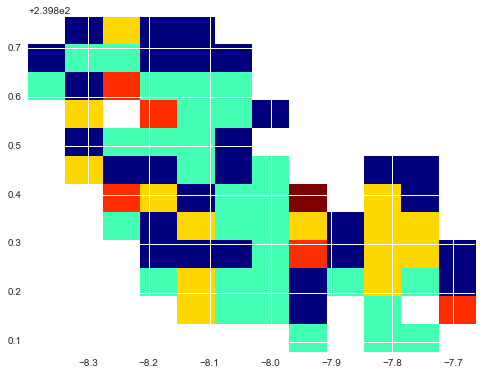

In [60]:
N,xedges,yedges=binned_statistic_2d(x,y,z,'count',bins=12)
cmap=sns.plt.cm.jet
cmap.set_bad('w',1.)
sns.plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
# levels = np.linspace(0, np.log10(N.max()), 7)[2:]
# plt.contour(np.log10(N.T), levels, colors='k', linewidths=1,
#             extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [61]:
bright['1_y'].describe()

count    148.000000
mean       0.058951
std        0.053180
min        0.000644
25%        0.042996
50%        0.048570
75%        0.061488
max        0.290690
Name: 1_y, dtype: float64

In [62]:
(ebv_m3[1]-ebv_p1[1]).describe()

count    161.000000
mean       0.003118
std        0.094445
min       -0.317803
25%       -0.027378
50%       -0.001096
75%        0.022684
max        0.412440
Name: 1, dtype: float64

In [63]:
reds = pd.read_csv('rc_ebvs.dat',header=None)

In [64]:
alld = pd.read_csv('ALL-2MASS-matched.csv')

In [65]:
reds = pd.merge(reds,alld,left_on=[0],right_on=['ID'])

In [66]:
ll = bright['1_y']
pp = bright['Vmag_ERR']
kk = bright['k_msig_stdap']

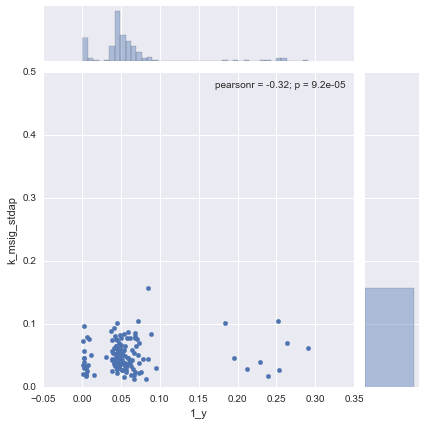

In [67]:
sns.jointplot(ll,kk,ylim=(0,0.5))

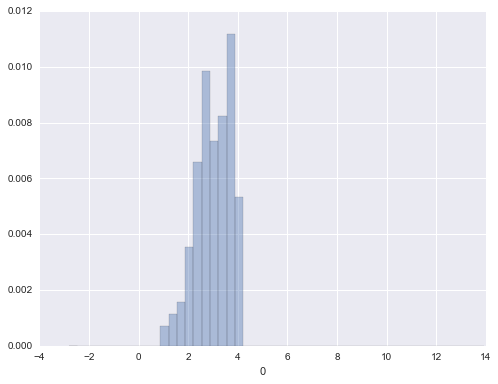

In [68]:
sns.distplot(pd.read_csv('rc_dist_error/vnSt02478.dft',header=None,sep=' ')[0],
             hist_kws={'weights' : pd.read_csv('rc_dist_error/vnSt02478.dft',header=None,sep=' ')[1]},kde=False)

In [69]:
# sns.kdeplot(pd.read_csv('rc_dist_error/vnSt02219.dft',header=None,sep=' ')[0],
#               pd.read_csv('rc_dist_error/vnSt02219.dft',header=None,sep=' ')[1],vertical=True)

In [70]:
fullm3.columns

Index([             0,          '0_x',          '1_x',          '0_y',
                '1_y',          '2_x',           'ID',         'Vmag',
           'Vmag_ERR',          'UmB',      'UmB_ERR',          'BmV',
            'BmV_ERR',          'VmR',      'VmR_ERR',          'VmI',
            'VmI_ERR',           'RA',          'DEC',         'GLON',
               'GLAT',         'VHEL',     'VHEL_ERR',         'TEFF',
           'TEFF_ERR',         'LOGG',     'LOGG_ERR',         'ABUN',
           'ABUN_ERR',  'designation',          'j_m',      'j_cmsig',
          'j_msigcom',        'j_snr',          'h_m',      'h_cmsig',
          'h_msigcom',        'h_snr',          'k_m',      'k_cmsig',
          'k_msigcom',        'k_snr',      'ph_qual',       'rd_flg',
             'bl_flg',       'cc_flg',   'gal_contam',       'mp_flg',
            'pts_key',    'j_m_stdap', 'j_msig_stdap',    'h_m_stdap',
       'h_msig_stdap',    'k_m_stdap', 'k_msig_stdap',         'Bmag',
      

In [71]:
fullm3.head(2)

,0,0_x,1_x,0_y,1_y,2_x,ID,Vmag,Vmag_ERR,UmB,...,Rmag,Imag,diserr,1,2_y,3,4,5,6,dis
0,2801,2801,1.981351,0.179640,0.057002,2801,2801,17.3668,0.0252,99.9999,...,16.6741,16.0320,3.605799,4916,110.5,3.37,0.19,-0.62,0.08,10.994156
1,1928,1928,0.796001,0.291773,0.050013,1928,1928,17.0384,0.0246,99.9999,...,15.8138,15.1439,5.081183,4661,111.0,2.82,0.35,-0.38,0.12,15.492633


In [72]:
b = fullm3['GLAT'].apply(math.radians)
l = fullm3['GLON'].apply(math.radians)
fullm3['rgc'] = (((fullm3['dis']*b.apply(math.cos)*l.apply(math.cos))-8.)**2 + (fullm3['dis']*b.apply(math.cos)*l.apply(math.sin))**2 \
    +(fullm3['dis']*b.apply(math.sin))**2).apply(math.sqrt)


In [73]:
b = fullm3['GLAT'].apply(math.radians)
l = fullm3['GLON'].apply(math.radians)
fullm3['vgr'] = fullm3['VHEL']+(232.3 * (b.apply(math.sin) *math.sin(math.radians(1.7))) + (b.apply(math.cos) *math.cos(math.radians(1.7))*(l- math.radians(87.8))\
                            .apply(math.cos)))
fullm3['vgsr'] = fullm3['VHEL'] + (7.01*b.apply(math.cos)*l.apply(math.cos)) + (250.*b.apply(math.cos)*l.apply(math.sin)) + (4.95*b.apply(math.sin))

Populating the interactive namespace from numpy and matplotlib


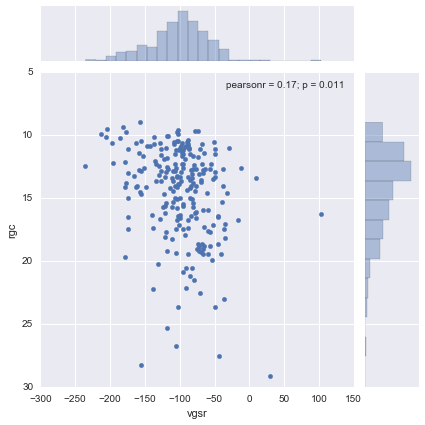

In [74]:
%pylab inline
pylab.rcParams['figure.figsize']=(15.,10.)
#sns.jointplot(fullm3['VHEL'],dis_m3,ylim=(30,0),)
sns.jointplot(fullm3['vgsr'],fullm3['rgc'],ylim=(30,5),)

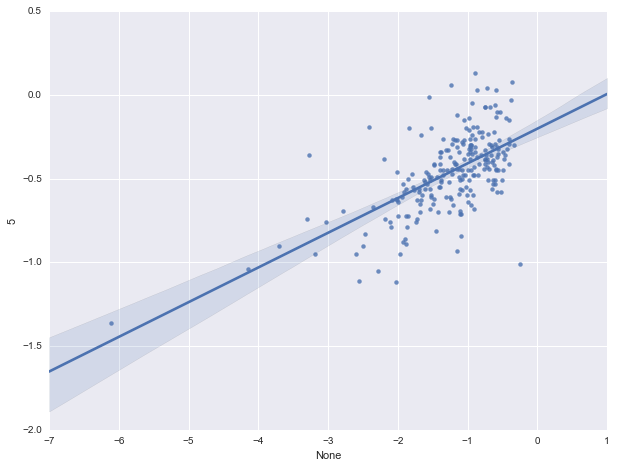

In [75]:
pylab.rcParams['figure.figsize']=(10.,7.5)
#sns.regplot(fullm3['rgc'],fullm3[5],truncate=False)
zh=((fullm3['GLAT'].apply(math.radians)).apply(math.sin) )* dis_m3
sns.regplot(zh,fullm3[5],truncate=False)

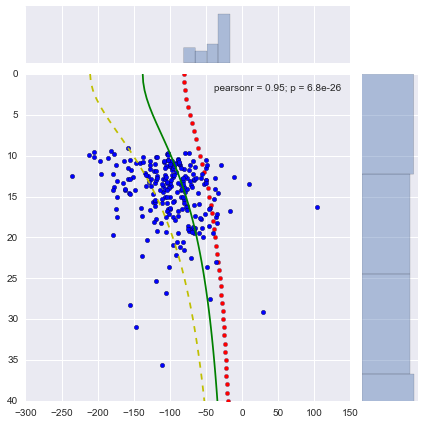

In [81]:
def z_func(y,x):
    #x = fullm3['vgsr'] - (7.01*b.apply(np.cos)*l.apply(np.cos)) + (250.*b.apply(np.cos)*l.apply(np.sin)) + (4.95*b.apply(np.sin))
    #return ((1/(((x/(8*np.sin(4.18879))))+(230/8)))*y)
    b=(np.radians(-8.))
    l=(np.radians(240.))
    return y*(8.3*(np.cos(b))*(np.sin(l)))/np.sqrt((x*(np.cos(b))*(np.sin(l)))**2 + (8.3 -((np.cos(b))*(np.cos(l))))**2 )  
x = arange(0,50,1)
Z1 = z_func(100,x) # evaluation of the function on the grid
#Z1
Z2 = z_func(170,x)
Z3=z_func(260,x)
# #len(Z1),len(fullm3['vgsr'])
pp=sns.jointplot(Z1,x,c='r',ylim=(40,0))
pp.x=Z2
pp.plot_joint(plt.plot,c='g')
# # pp.x=x
pp.x=Z3
pp.plot_joint(plt.plot,c='y',linestyle='--')
pp.x=fullm3['vgsr']
pp.y=fullm3['rgc']
# # #pp.y=dis_m3
pp.plot_joint(plt.scatter)
#sns.jointplot(fullm3['VHEL'],dis_m3,ylim=(30,0),)

In [82]:
fullm3lg = fullm3.loc[fullm3[3] <= 3.5]

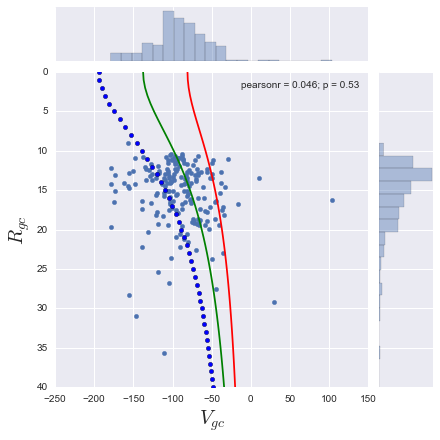

In [84]:
def z_func(y,x):
    #x = fullm3lg['vgsr'] - (7.01*b.apply(np.cos)*l.apply(np.cos)) + (250.*b.apply(np.cos)*l.apply(np.sin)) + (4.95*b.apply(np.sin))
    #return ((1/(((x/(8*np.sin(4.18879))))+(230/8)))*y)
    b=(np.radians(-8.))
    l=(np.radians(240.))
    return y*(8.3*(np.cos(b))*(np.sin(l)))/np.sqrt((x*(np.cos(b))*(np.sin(l)))**2 + (8.3 -((np.cos(b))*(np.cos(l))))**2 )  
x = arange(0,50,1)
Z1 = z_func(100,x) # evaluation of the function on the grid
#Z1
Z2 = z_func(170,x)
Z3=z_func(240,x)
# #len(Z1),len(fullm3lg['vgsr'])
pp=sns.jointplot(fullm3lg['vgsr'],fullm3lg['rgc'],ylim=(40,0))
#pp=sns.jointplot(Z1,x,c='r',ylim=(40,0))
pp.y=x
pp.x=Z1
pp.plot_joint(plt.plot,c='r',)
pp.x=Z2
pp.plot_joint(plt.plot,c='g')
pp.x=Z3
#pp.plot_joint(plt.plot,c='y')
# pp.x=fullm3lg['vgsr']
# pp.y=fullm3lg['rgc']
# # #pp.y=dis_m3
pp.set_axis_labels(xlabel='$V_{gc}$',ylabel='$R_{gc}$',fontsize=20)
pp.plot_joint(plt.scatter)
#sns.jointplot(fullm3lg['VHEL'],dis_m3,ylim=(30,0),)
plt.savefig('Rgc_vs_Vgc_canis')

In [85]:
fullm3lg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 236
Data columns (total 70 columns):
0               191 non-null int64
0_x             191 non-null int64
1_x             190 non-null float64
0_y             191 non-null float64
1_y             187 non-null float64
2_x             191 non-null int64
ID              191 non-null int64
Vmag            191 non-null float64
Vmag_ERR        191 non-null float64
UmB             191 non-null float64
UmB_ERR         191 non-null float64
BmV             191 non-null float64
BmV_ERR         191 non-null float64
VmR             191 non-null float64
VmR_ERR         191 non-null float64
VmI             191 non-null float64
VmI_ERR         191 non-null float64
RA              191 non-null float64
DEC             191 non-null float64
GLON            191 non-null float64
GLAT            191 non-null float64
VHEL            191 non-null float64
VHEL_ERR        191 non-null float64
TEFF            191 non-null float64
TEFF_ERR       

In [86]:
df = pd.DataFrame({"zh": zh,
                       "vgr": fullm3['vgsr'],
                       "feh": fullm3[5]},)

In [87]:
df.head(2)

,feh,vgr,zh
0,-0.62,-102.812758,-1.488394
1,-0.38,-81.992908,-2.205095


In [88]:
bins = np.linspace(-3, 0, 4)

In [89]:
bins

array([-3., -2., -1.,  0.])

In [90]:
groups = df.groupby(pd.cut(df.zh, bins))

In [91]:
groups.describe()

feh         vgr          zh
zh                                                
(-3, -2] count   18.000000   18.000000   18.000000
         mean    -0.735556  -83.125589   -2.263089
         std      0.244305   29.607616    0.240966
         min     -1.120000 -138.675827   -2.780988
         25%     -0.882500 -100.310463   -2.455274
         50%     -0.730000  -83.638006   -2.194145
         75%     -0.630000  -60.877434   -2.046268
         max     -0.190000  -35.932704   -2.001223
(-2, -1] count  108.000000  108.000000  108.000000
         mean    -0.508148  -93.544187   -1.419419
         std      0.187388   42.123624    0.282408
         min     -0.950000 -179.140353   -1.991979
         25%     -0.612500 -118.732763   -1.635103
         50%     -0.510000  -95.109390   -1.392556
         75%     -0.410000  -70.027006   -1.155473
         max      0.060000  103.306330   -1.003612
(-1, 0]  count  100.000000  100.000000  100.000000
         mean    -0.334000 -110.412783   -0.722836
         std      0.180107   43.133481    0.190802
         min     -1.010000 -235.326415   -0.995872
         25%     -0.440000 -133.999593   -0.905115
         50%     -0.345000 -102.529761   -0.724413
         75%     -0.247500  -83.240348   -0.586179
         max      0.130000  -11.328707   -0.253229

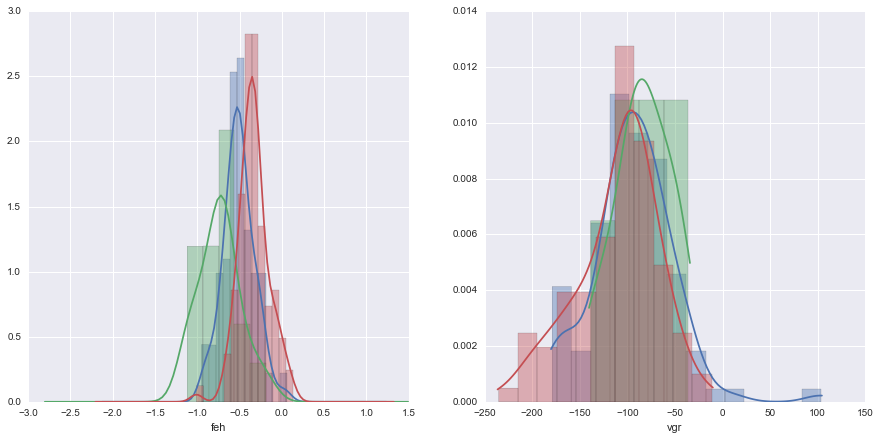

In [93]:
f,axes=plt.subplots(1,2,figsize=(15,7))
sns.despine(left=True)
for i in groups.groups:
    ll=groups.get_group(i)
    #print (ll['feh'])
    sns.distplot(ll['feh'],ax=axes[0])
    sns.distplot(ll['vgr'],ax=axes[1])
    f.savefig('para_distributions_canis.png')

In [94]:
alp_b=pd.read_csv('alpha_final_werr.dat',header=None,sep=' ')
alp_f2=pd.read_csv('alpha_faint2_werr.dat',header=None,sep=' ')
alp_f1=pd.read_csv('alpha_faint1_werr.dat',header=None,sep=' ')
#alp_all=alp_b.append(alp_f1,ignore_index=True).append(alp_f2,ignore_index=True)
alp_all2=alp_f1.append(alp_f2,ignore_index=True)
alp_all2=alp_all2.append(alp_b,ignore_index=True)

In [95]:
alp_all2.head()

,0,1,2,3,4,5,6
0,vnSt01430.dft,-0.22,-0.23,-0.19,-0.22,-0.26,-0.19
1,vnSt01458.dft,-0.52,-0.54,-0.49,-0.63,-0.73,-0.61
2,vnSt01524.dft,0.15,0.13,0.17,-0.09,-0.14,-0.06
3,vnSt01538.dft,-0.49,-0.53,-0.44,-0.51,-0.56,-0.42
4,vnSt01568.dft,-1.86,-1.92,-1.81,-1.63,-1.68,-1.5


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


<Container object of 3 artists>

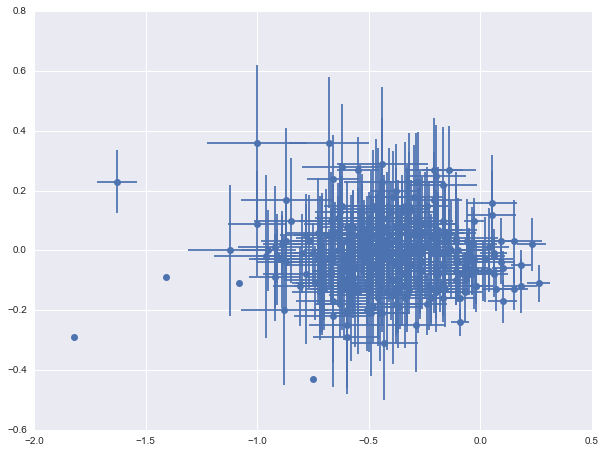

In [96]:
alp_all2 = alp_all2.convert_objects(convert_numeric=True)
xer = (alp_all2[6]-alp_all2[5])/2
x2er = (alp_all2[3]-alp_all2[2])/2
yer = np.sqrt(xer**2 + x2er**2)
plt.errorbar(alp_all2[4],alp_all2[4]-alp_all2[1],xerr=xer,yerr=yer,fmt='o')
#plt.errorbar(fullm3alp[2],fullm3alp['1l']-fullm3alp[2],fmt='o')

In [98]:
alp_all2[0] = alp_all2[0].map(lambda x: x.lstrip('vnSt').rstrip('.dft')).astype(int)

In [100]:
fullm3alp = pd.merge(fullm3,alp_all2,left_on=[0],right_on=[0],suffixes=('k','l'))

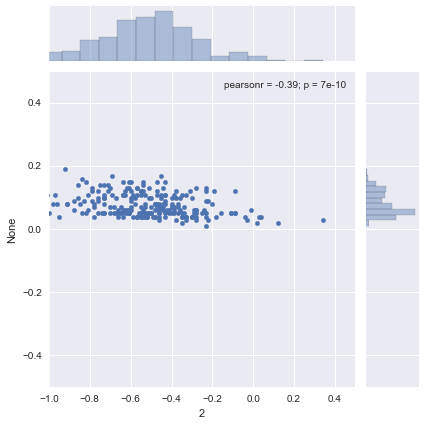

In [101]:
sns.jointplot(fullm3alp[2],fullm3alp['1l']-fullm3alp[2],xlim=(-1,0.5),ylim=(-0.5,0.5))

In [102]:
fullm3lg.head(2)

,0,0_x,1_x,0_y,1_y,2_x,ID,Vmag,Vmag_ERR,UmB,...,1,2_y,3,4,5,6,dis,rgc,vgr,vgsr
0,2801,2801,1.981351,0.179640,0.057002,2801,2801,17.3668,0.0252,99.9999,...,4916,110.5,3.37,0.19,-0.62,0.08,10.994156,16.475859,114.468540,-102.812758
1,1928,1928,0.796001,0.291773,0.050013,1928,1928,17.0384,0.0246,99.9999,...,4661,111.0,2.82,0.35,-0.38,0.12,15.492633,20.604807,135.795082,-81.992908


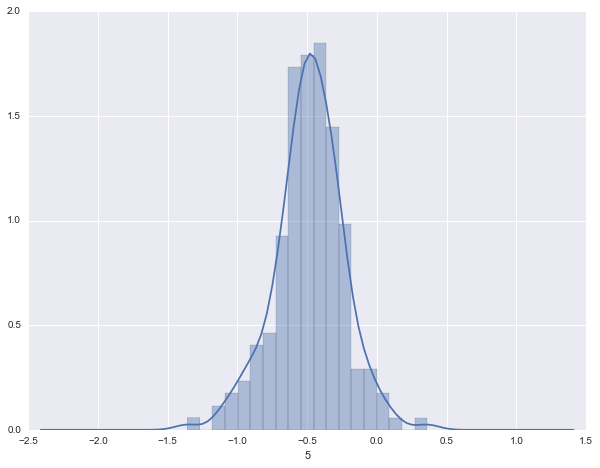

In [103]:
sns.distplot(fullm3lg[5])

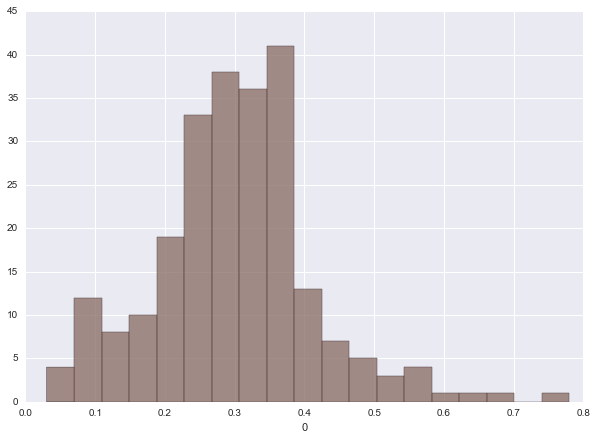

In [105]:
#sns.distplot(ebv_m3[0],kde=None,color='g')
f,axes=plt.subplots(1,figsize=(10,7))
sns.despine(left=True)
for i in groups.groups:
    ll=groups.get_group(i)
    #print (ll['feh'])
    sns.distplot(ebv_m3[0],kde=None)
    #sns.distplot(ll['feh'],ax=axes[0])
    #sns.distplot(ll['vgr'],ax=axes[1])
    f.savefig('reddening_canis.png')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


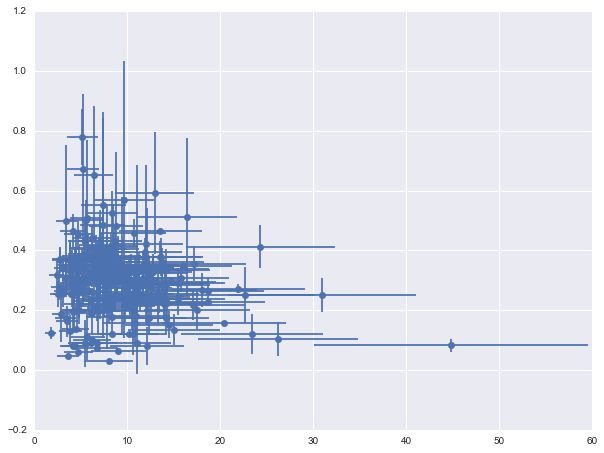

In [107]:
%pylab inline
pylab.rcParams['figure.figsize']=(10.,7.5)
axes=plt.gca()
#axes.set_xlim([0,60])
sns.plt.errorbar(dis_m3,fullm3['0_y'],yerr=fullm3['1_y'],xerr=fullm3['diserr'],fmt='o',)
plt.savefig('paka.png')

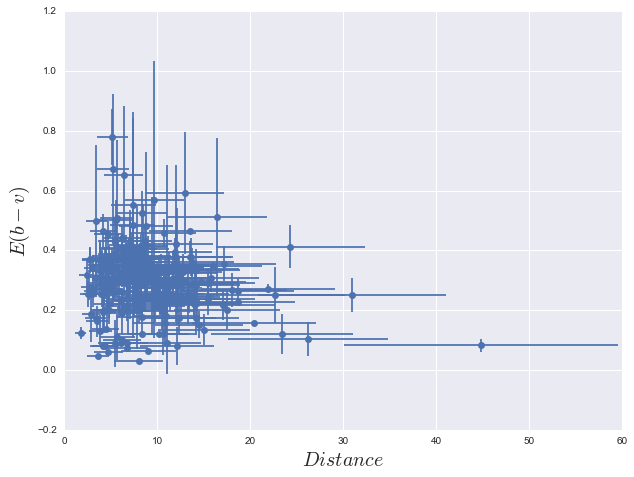

In [109]:
ax = plt.axes()
ax.errorbar(dis_m3,fullm3['0_y'],yerr=fullm3['1_y'],xerr=fullm3['diserr'],fmt='o',capsize=4)
#ax.legend(loc=3)
ax.set_xlabel('$Distance$',fontsize=20)
ax.set_ylabel('$E(b-v)$',fontsize=20)
plt.savefig('redd_vs_distane_canis.png')

(array([ 15.,  18.,  44.,  70.,  59.,  16.,   8.,   4.,   2.,   1.]),
 array([ 0.03040731,  0.10529999,  0.18019268,  0.25508536,  0.32997804,
         0.40487072,  0.4797634 ,  0.55465608,  0.62954876,  0.70444144,
         0.77933412]),
 <a list of 10 Patch objects>)

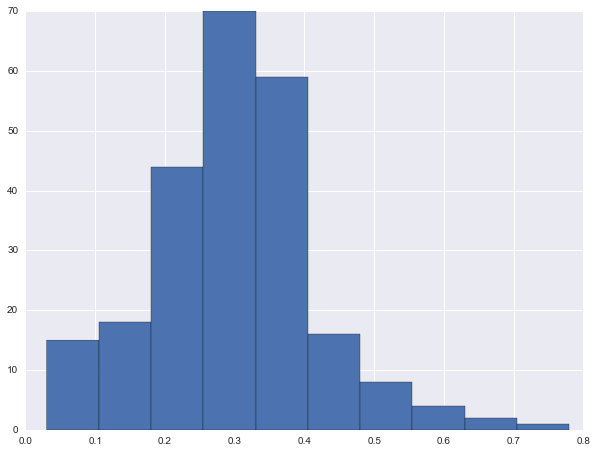

In [110]:
hist(ebv_m3[0],)

In [111]:
df1=pd.DataFrame({"zh": zh,
                       "rgc": fullm3['rgc'],
                       "feh": fullm3[5]},)

In [112]:
df11=df1.loc[(df1["rgc"] <=11) &(df1["rgc"] >9) &(df1["zh"] >-1.)&(df1["zh"]<1.0)]

In [113]:
df12=df1.loc[(df1["rgc"] <=16) &(df1["rgc"] >12) &(df1["zh"] >-1)&(df1["zh"]<1.0)]

In [114]:
df13=df1.loc[(df1["rgc"] <=15) &(df1["rgc"] >14) &(df1["zh"] >-1)&(df1["zh"]<1.0)]

In [115]:
df21=df1.loc[(df1["rgc"] <=13) &(df1["rgc"] >9) &(df1["zh"] >-2)&(df1["zh"]<-1.0)]
df22=df1.loc[(df1["rgc"] <=16) &(df1["rgc"] >12) &(df1["zh"] >-2)&(df1["zh"]<-1.0)]
df23=df1.loc[(df1["rgc"] <=16) &(df1["rgc"] >14) &(df1["zh"] >-2.)&(df1["zh"]<-1.0)]

In [116]:
df31=df1.loc[(df1["rgc"] <=12) &(df1["rgc"] >9) &(df1["zh"] >-3.)&(df1["zh"]<-1.5)]
df32=df1.loc[(df1["rgc"] <=16) &(df1["rgc"] >12) &(df1["zh"] >-3.)&(df1["zh"]<-1.5)]
df33=df1.loc[(df1["rgc"] <=16) &(df1["rgc"] >14) &(df1["zh"] >-3.)&(df1["zh"]<-2.0)]

In [117]:
df11=df1.loc[(df1["rgc"] <=14) &(df1["rgc"] >9) &(df1["zh"] >-1.)&(df1["zh"]<1.0)]
df12=df1.loc[(df1["rgc"] <=20) &(df1["rgc"] >14) &(df1["zh"] >-1)&(df1["zh"]<1.0)]
df21=df1.loc[(df1["rgc"] <=14) &(df1["rgc"] >9) &(df1["zh"] >-2)&(df1["zh"]<-1.0)]
df22=df1.loc[(df1["rgc"] <=20) &(df1["rgc"] >14) &(df1["zh"] >-2)&(df1["zh"]<-1.0)]

In [118]:
df11=df1.loc[(df1["rgc"] <=15) &(df1["rgc"] >13) &(df1["zh"] >-2)&(df1["zh"]<-1.0)]
df13=df1.loc[(df1["rgc"] <=11) &(df1["rgc"] >9) &(df1["zh"] >-0.5)&(df1["zh"]<0.)]
df12=df1.loc[(df1["rgc"] <=11) &(df1["rgc"] >9) &(df1["zh"] >-1.)&(df1["zh"]<0.5)]

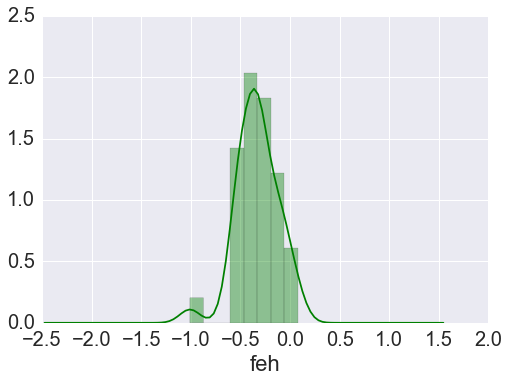

In [120]:
sns.set(font_scale=2)
sns.distplot(df12['feh'].dropna(),color='g')
#sns.distplot(df12['feh'].dropna())
#sns.distplot(df11['feh'].dropna(),color='g')


In [121]:
df12['feh'].describe()

count    36.000000
mean     -0.331667
std       0.209209
min      -1.010000
25%      -0.450000
50%      -0.330000
75%      -0.202500
max       0.080000
Name: feh, dtype: float64

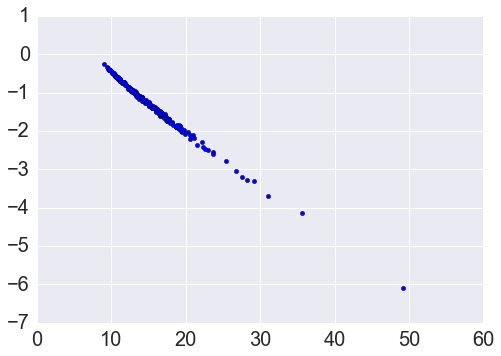

In [122]:
sns.plt.scatter(df1['rgc'],df1['zh'])